# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_num = df['Mouse ID'].nunique()
mice_num


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
"""
Getting duplicate mice by ID number that shows up for Mouse ID and Timepoint means getting mouse IDs with duplicate timepoints.
Use a set comprehension to append just once any mouse ID such that there are duplicate Timepoint values associated with them.
Convert that set to a list, convert that list to a Series, and then convert that Series to a numpy array so that the output matches
the starter code's output.
"""
dup_mice = pd.Series(list({mouse for mouse in df['Mouse ID'] 
			if not df[(df['Mouse ID'] == mouse)]['Timepoint'].is_unique}))
dup_mice.to_numpy()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = df[(df['Mouse ID'].isin(dup_mice))]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_raw = df.copy() # Keep a raw unclean copy of df just in case.
df = df[(~df['Mouse ID'].isin(dup_mice))]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_num = df['Mouse ID'].nunique()
mice_num

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tv = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tv = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tv = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tv = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tv = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": mean_tv, "Median Tumor Volume": median_tv, 
									 "Tumor Volume Variance": var_tv, "Tumor Volume Std. Dev.": std_tv, "Tumor Volume Std. Err.":  sem_tv})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_Regimen_Summary = df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
Drug_Regimen_Summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

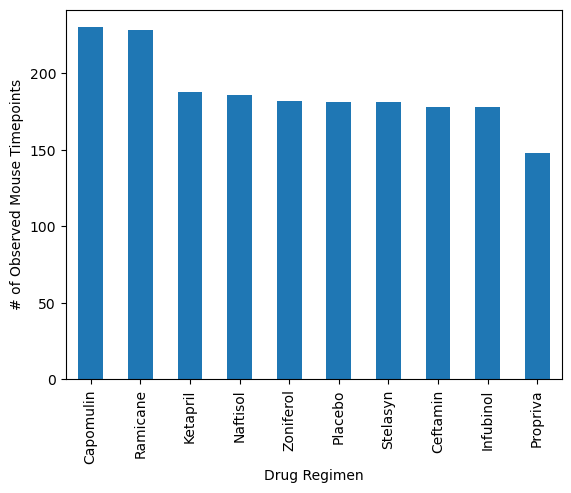

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot = df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False).plot(kind="bar", 
                                                                                           xlabel="Drug Regimen", 
                                                                                           ylabel="# of Observed Mouse Timepoints")

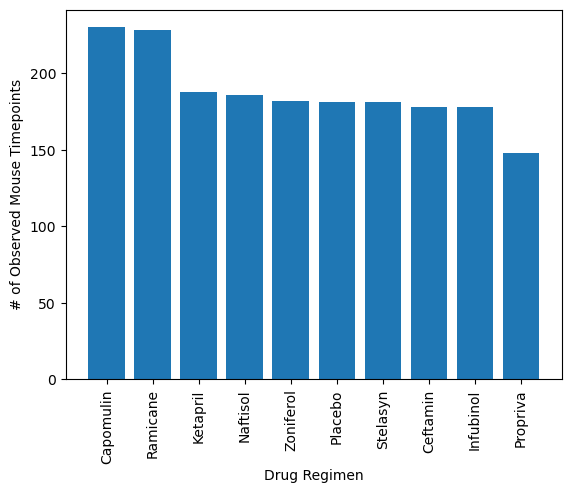

In [10]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False).index, 
        df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False).values) # type: ignore
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

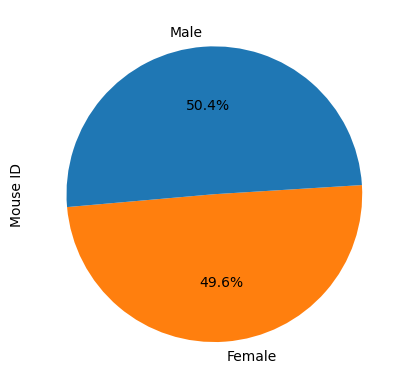

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
"""
To get pie plot of female versus male mice, first drop all the duplicates of Mouse IDs,
 so that there is one line of each unique mouse ID, i.e., one line for each mouse.
Then group them by sex and get a count of how many mice are of either sex.
Then plot it in a pie chart with the y-axis label as "Sex", the percentages shown, and the chart rotated 185 degrees clockwise to match
the starter code's output as much as possible. 
"""
colors = ["tab:orange", "tab:blue"]
plot = df.drop_duplicates(subset=["Mouse ID"]).groupby(["Sex"])["Mouse ID"].count().plot.pie(labels=df["Sex"].unique(),
                                                    autopct='%1.1f%%', startangle=185, colors=colors)


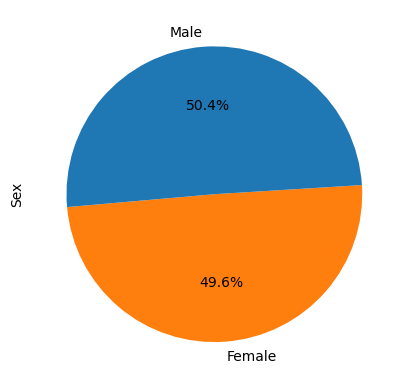

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df.drop_duplicates(subset=["Mouse ID"]).groupby(["Sex"])["Mouse ID"].count().values, 
	labels=df.drop_duplicates(subset=["Mouse ID"]).groupby(["Sex"])["Mouse ID"].count().index,
	autopct='%1.1f%%', startangle=185,
	data=df.drop_duplicates(subset=["Mouse ID"]).groupby(["Sex"])["Mouse ID"].count(), colors=colors)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_final_timepoint = df.groupby(['Mouse ID'])[['Timepoint']].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_final_tumour_vol = pd.merge(left=df_final_timepoint, right=df, on=["Mouse ID", "Timepoint"])
df_final_tumour_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumour_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in regimens:
	
	# Locate the rows which contain mice on each drug and get the tumor volumes, and then add that subset to the list
	final_tumour_volume.append(df_final_tumour_vol.loc[(df_final_tumour_vol["Drug Regimen"] == treatment), "Tumor Volume (mm3)"])
	
	# Determine outliers using upper and lower bounds
	print(f"{treatment}'s interquartile range: {st.iqr(final_tumour_volume[-1])}")
	print(f"{treatment}'s potential outliers: {final_tumour_volume[-1].loc[(final_tumour_volume[-1]<final_tumour_volume[-1].quantile(0.25) - (1.5*st.iqr(final_tumour_volume[-1]))) | (final_tumour_volume[-1]>final_tumour_volume[-1].quantile(0.75) + (1.5*st.iqr(final_tumour_volume[-1])))]}\n")

Capomulin's interquartile range: 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's interquartile range: 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's interquartile range: 11.477135160000003
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's interquartile range: 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



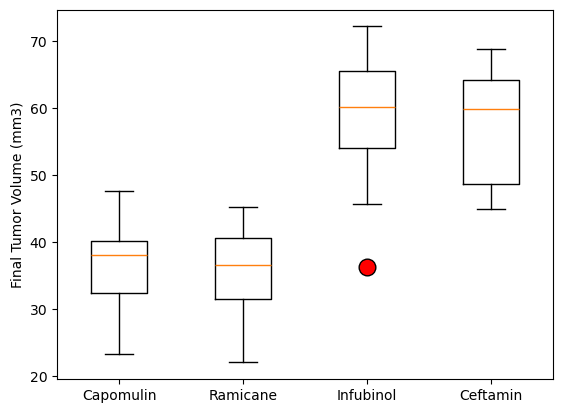

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(final_tumour_volume, labels=regimens, flierprops=dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='black'))
plt.show()

## Line and Scatter Plots

In [38]:
df[(df["Mouse ID"]=='l509')]["Timepoint"]

231      0
253      5
539     10
881     15
982     20
1146    25
1414    30
1499    35
1723    40
1771    45
Name: Timepoint, dtype: int64

In [40]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on 

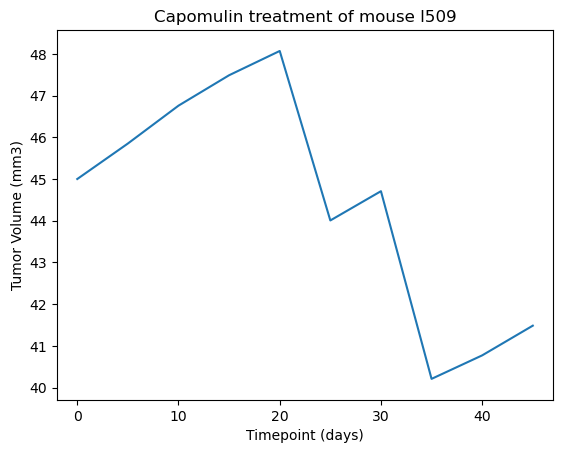

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot("Timepoint", "Tumor Volume (mm3)", color="tab:blue", data=df[(df["Mouse ID"]=='l509')])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(df[(df["Mouse ID"]=='l509')]["Timepoint"].min()-2,df[(df["Mouse ID"]=='l509')]["Timepoint"].max()+2)
plt.ylim(df[(df["Mouse ID"]=='l509')]["Tumor Volume (mm3)"].min()-0.5,df[(df["Mouse ID"]=='l509')]["Tumor Volume (mm3)"].max()+0.5)
plt.show()

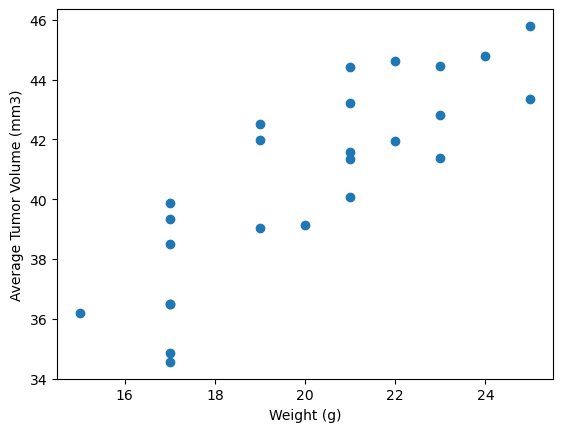

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


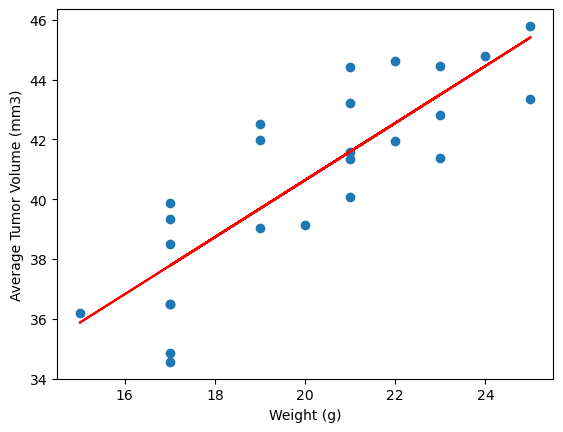

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
